In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [150]:
sns.set_theme(style="whitegrid")

In [91]:
import os
NOTEBOOK_PATH = os.getcwd() 
DATA_PATH = os.path.join(NOTEBOOK_PATH, 'participant_data')

In [127]:
def find_participant_ids():
    """
    Participant ids are the directory names in participant data directory.
    """
    return os.listdir(DATA_PATH)

In [128]:
def load_experiment_data(experiment='savings', phase=0):
    """
    Load experiment data for all participants
    """
    participant_ids = find_participant_ids()
    savings_data = {}
    for participant_id in participant_ids:
        savings_file = os.path.join(DATA_PATH,  participant_id,experiment, f'{phase}',f"participant_{participant_id}_session_1.csv")       
        if os.path.exists(savings_file):
            savings_data[participant_id] = pd.read_csv(savings_file)    
    return  pd.concat(savings_data.values())

In [124]:
def load_savings_data(phase):
    """
    Load savings data for all participants in a phase.
    """
    return load_experiment_data('savings', phase)

In [130]:
def load_generalization_data(phase):
    """
    Load generalization data for all participants in a phase.
    """
    return load_experiment_data('generalization', phase)

In [133]:
subjects =load_savings_data(0)

# Group A : Generalization


In [138]:
perturbation_changes = {
    1: (False, None),  # Turn OFF perturbation
    20: (True, "sudden"),  # Sudden perturbation ON
    80: (False, None),  # Turn OFF perturbation
    100: (False, None),  # Turn OFF perturbation
    120: (True, "sudden"),  # Sudden perturbation ON
    180: (False, None),  # Turn OFF perturbation
    200: (False, None)  # Turn OFF perturbation
}

experimental_conditions = {
    'sudden': [[20, 80], [120, 180]],
    'no perturbation': [[0, 20], [80, 120], [180, 200]]
}

## Savings

Text(0.5, 1.0, 'Error Angle of Each Participant Over Time')

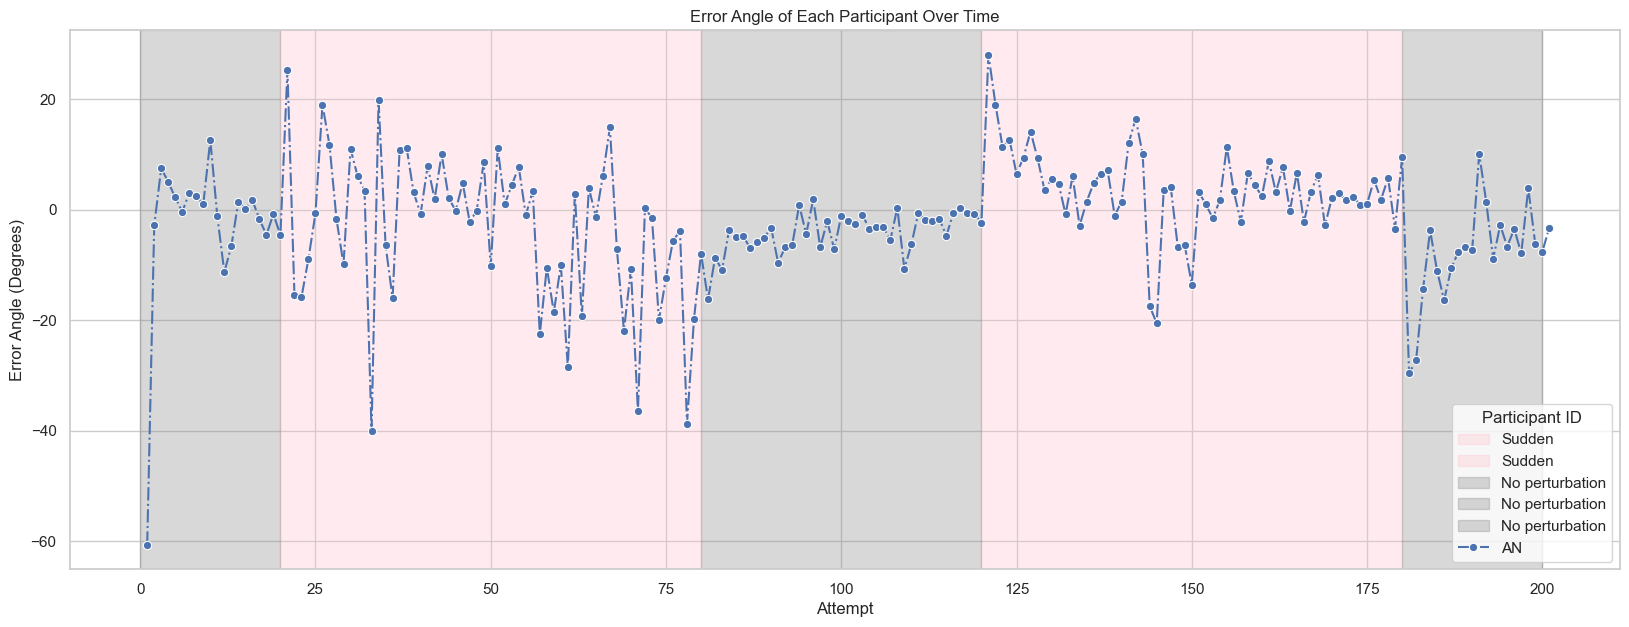

In [158]:
# For each subject, calculate the mean error angle for each session
mean_error_angles = subjects.groupby(['Participant ID', 'Session'])['Error Angle'].mean()
plt.figure(figsize=(20, 7))
# plot the target angle for each session
# Mark regions of no perturbation and sudden perturbation. 
# For each region, shade the region with a different color
experimental_condition_color_mapping= {
    'sudden': 'pink',
    'no perturbation': 'grey'
}

for region, region_limits in experimental_conditions.items():
    for region_limit in region_limits:
        plt.axvspan(region_limit[0], region_limit[1], color=experimental_condition_color_mapping[region], alpha=0.3, label=region.capitalize())

sns.lineplot(x='Attempt', y='Error Angle', data=subjects, hue='Participant ID', linestyle='-.', marker='o')
plt.xlabel('Attempt')
plt.ylabel('Error Angle (Degrees)')
plt.title('Error Angle of Each Participant Over Time')

In [146]:
# Mean error angle over all particpants for each timestep 
mean_error_angles = subjects.groupby(['Attempt'])['Error Angle'].mean()
std_error_angles = subjects.groupby(['Attempt'])['Error Angle'].std()
assert len(mean_error_angles) == len(std_error_angles)


Text(0.5, 1.0, 'Mean and Standard Deviation of Error Angle Over Time')

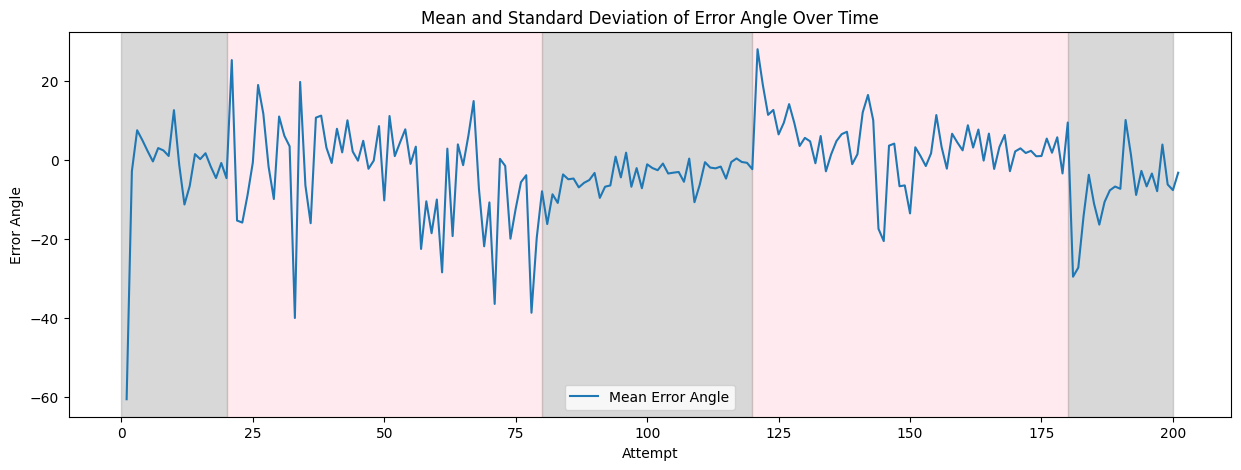

In [147]:
# Plot the mean and standard deviation of the error angle for each timestep accross particpants

plt.figure(figsize=(15, 5))
for region, region_limits in experimental_conditions.items():
    for region_limit in region_limits:
        plt.axvspan(region_limit[0], region_limit[1], color=experimental_condition_color_mapping[region], alpha=0.3)
        
sns.lineplot(x='Attempt', y='Error Angle', data=mean_error_angles.reset_index(), label='Mean Error Angle')
plt.fill_between(mean_error_angles.index, mean_error_angles - std_error_angles, mean_error_angles + std_error_angles, color='purple', alpha=0.3)
plt.title('Mean and Standard Deviation of Error Angle Over Time')


### Participant 

## TASK-1: Implementation of recording mode and new experiment.

### Experimental Methodology

## TASK-2: Analysis of experiment on unbiased subjects

## TASK-3: Discussion of Results.

## Task-4: Independent Experiments.

In [ ]:
def fake_participant_data_experiment_sudden_1(particpant_id, session_id, num_attempts):
    return pd.DataFrame({
    'Particpant ID': [particpant_id] * 100,
    'Session': [session_id] * 100,
    'Attempt': np.arange(0, 100),
    
    'Error Angle': np.concat([
        # Attempt 0 - 20 - without perturbation
        30 + np.random.uniform(-1, 1, 20) *5, 
        # Attmept 20-80 with perturbation
        30+20 + np.random.uniform(-10, 10, 60)*5,
        # Attempt 80-100 without perturbation
        30 + np.random.uniform(-1, 1, 20)*5
    ])
    })

## SCRATCH SPACE

In [ ]:
subjects = pd.concat([fake_participant_data_experiment_sudden_1(participant_id, 1, 100) for participant_id in range(3)])
subjects 